## Exercises using `flights` data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nycflights13 import flights

In [2]:
# 1.
# There are 9888 flights that delayed for at least 2 hours
len(flights.query("dep_delay >= 120"))

# Alternatively, use .shape and obtain the first element from its output
flights.query("dep_delay >= 120").shape[0]

# ... or the count() method
flights.query("dep_delay >= 120")["dep_delay"].count()

9888

In [3]:
# 9313 flights destined to airports in Houston.
flights.query("dest == 'IAH' or dest == 'HOU'").shape[0]

9313

In [4]:
# 86326 flights departed in summer months.
flights[flights["month"].isin([7, 8, 9])].shape[0]

86326

In [5]:
# 29 flights delayed for more than 2 hours but did not depart late.
flights.query("arr_delay > 120 and dep_delay <= 0").shape[0]

29

In [6]:
# 2. The flight was originated from JFK
flights.sort_values("dep_delay", ascending = False)[["dep_delay", "origin"]].head(1)

# Alternatively, use the nlargest() method
flights[["dep_delay", "origin"]].nlargest(1, "dep_delay")

,dep_delay,origin
7072,1301.0,JFK


In [7]:
# 3. The flight that travelled the greatest distance was originated from JFK and destined at HNL
flights.sort_values("distance", ascending = False)[["origin", "dest", "distance"]].head(1)

# Alternatively, use the nlargest() method
flights[["origin", "dest", "distance"]].nlargest(1, "distance")

,origin,dest,distance
162,JFK,HNL,4983


In [8]:
# 4 Missing dep_time means that the flights were cancelled
# For a subset of cancelled flights, the tail number was also unknown
qn4 = flights[flights["dep_time"].isna()]
qn4.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8255
sched_arr_time       0
arr_delay         8255
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          8255
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [9]:
# 5 dep_delay is the departure delay for each flight in minutes.
# We first subset a data frame with non-cancelled flights
qn5 = flights[flights["dep_time"].notna()]
qn5 = qn5[["sched_dep_time", "dep_time", "dep_delay"]]

# Difference between dep_time and sched_dep_time
# Not exactly the same as dep_delay, because time are not really continuous numbers
qn5["diff"] = qn5["dep_time"] - qn5["sched_dep_time"]
qn5.head()

,sched_dep_time,dep_time,dep_delay,diff
0,515,517.0,2.0,2.0
1,529,533.0,4.0,4.0
2,540,542.0,2.0,2.0
3,545,544.0,-1.0,-1.0
4,600,554.0,-6.0,-46.0


In [10]:
# About 2/3 of the values in diff are the same as dep_delay.
test = qn5["diff"] == qn5["dep_delay"]
test.value_counts()

True     228744
False     99777
Name: count, dtype: int64

In [11]:
# Subset rows where diff was not equal to dep_delay.
qn5_1 = qn5[~test]
qn5_1

,sched_dep_time,dep_time,dep_delay,diff
4,600,554.0,-6.0,-46.0
6,600,555.0,-5.0,-45.0
7,600,557.0,-3.0,-43.0
8,600,557.0,-3.0,-43.0
9,600,558.0,-2.0,-42.0
...,...,...,...,...
336759,2140,2207.0,27.0,67.0
336760,2059,2211.0,72.0,152.0
336762,2113,2233.0,80.0,120.0
336763,2001,2235.0,154.0,234.0


In [12]:
# A closer look at diff and dep_delay
qn5_1.sort_values("diff", ascending = False)

,sched_dep_time,dep_time,dep_delay,diff
151974,810,2321.0,911.0,1511.0
270987,759,2257.0,898.0,1498.0
119784,830,2243.0,853.0,1413.0
127928,1016,2324.0,788.0,1308.0
132291,615,1921.0,786.0,1306.0
...,...,...,...,...
215892,2359,1.0,2.0,-2358.0
240026,2359,1.0,2.0,-2358.0
109552,2359,1.0,2.0,-2358.0
275948,2359,1.0,2.0,-2358.0


In [13]:
# Here is one way to obtain the correct time difference between scheduled departure and departure
# First, obtain the departure times in minutes after midnight (so it becomes continuous)
qn5_1 = qn5_1.copy()
qn5_1["sched_mins"] = (qn5_1["sched_dep_time"] // 100) * 60 + qn5_1["sched_dep_time"] % 100
qn5_1["dep_mins"] = (qn5_1["dep_time"] // 100) * 60 + qn5_1["dep_time"] % 100

qn5_1["diff"] = qn5_1["dep_mins"] - qn5_1["sched_mins"]
qn5_1 = qn5_1[["sched_dep_time", "dep_time", "dep_delay", "diff"]]
qn5_1

,sched_dep_time,dep_time,dep_delay,diff
4,600,554.0,-6.0,-6.0
6,600,555.0,-5.0,-5.0
7,600,557.0,-3.0,-3.0
8,600,557.0,-3.0,-3.0
9,600,558.0,-2.0,-2.0
...,...,...,...,...
336759,2140,2207.0,27.0,27.0
336760,2059,2211.0,72.0,72.0
336762,2113,2233.0,80.0,80.0
336763,2001,2235.0,154.0,154.0


In [14]:
# 6. F9 has the worst average departure delay
flights.groupby("carrier")[["dep_delay"]].agg("mean").sort_values("dep_delay", ascending = False).head(1)

# Alternatively, use the nlargest() method
flights.groupby("carrier")[["dep_delay"]].agg("mean").nlargest(1, "dep_delay")

,dep_delay
carrier,
F9,20.215543


In [15]:
# 7. HNL is the destination airport that has the max arrival delay
flights.groupby("dest")[["arr_delay"]].agg("max").nlargest(1, "arr_delay")

,arr_delay
dest,
HNL,1272.0


In [16]:
# 8. Average dep_delay and arr_delay by the hour
qn8 = flights.dropna().groupby("hour")[["dep_delay", "arr_delay"]].agg("mean")
qn8

,dep_delay,arr_delay
hour,,
5,0.688660,-4.796907
6,1.595001,-3.384485
7,1.910345,-5.304472
8,4.106755,-1.113227
9,4.539762,-1.451407
10,6.448992,0.953940
11,7.147747,1.481930
12,8.519330,3.489010
13,11.323894,6.544740


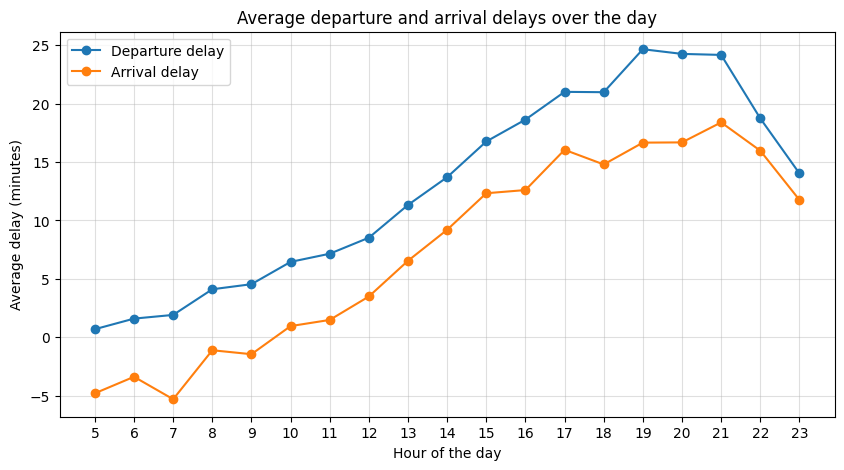

In [17]:
# 8. Visualization
# Set the figure size as needed
plt.figure(figsize=(10, 5))  
plt.plot(qn8.index, qn8["dep_delay"], label = "Departure delay", marker = "o")
plt.plot(qn8.index, qn8["arr_delay"], label = "Arrival delay", marker = "o")

plt.title("Average departure and arrival delays over the day")
plt.xlabel("Hour of the day")
plt.ylabel("Average delay (minutes)")
plt.xticks(qn8.index)  # so all hours are marked on the x-axis
plt.legend()
plt.grid(True, alpha = 0.4)

# Show plot
plt.show()

In [18]:
# 9. Flights that were cancelled
qn9 = flights[flights["dep_time"].isna()]
qn9.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01T21:00:00Z
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-02T00:00:00Z
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01T20:00:00Z
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01T11:00:00Z
1777,2013,1,2,NaN,1540,NaN,NaN,1747,NaN,EV,4352,N10575,EWR,CVG,NaN,569,15,40,2013-01-02T20:00:00Z


In [19]:
# Count of cancelled flights by hours over the day
qn9 = qn9.groupby("hour").agg("size").reset_index(name = "count")
qn9

,hour,count
0,1,1
1,5,9
2,6,425
3,7,289
4,8,442
5,9,327
6,10,290
7,11,296
8,12,388
9,13,429


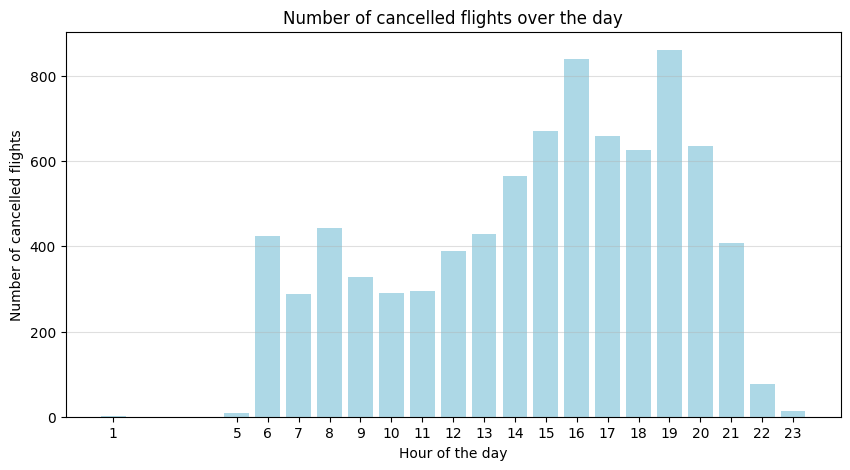

In [20]:
# Visualization
# Sets the figure size as needed
plt.figure(figsize=(10, 5)) 
# Creates a bar chart
plt.bar(qn9["hour"], qn9["count"], color="lightblue")  
plt.xlabel("Hour of the day") 
plt.ylabel("Number of cancelled flights")
plt.title("Number of cancelled flights over the day") 
plt.xticks(qn9["hour"]) 
plt.grid(True, axis = "y", alpha = 0.4) 
 # Displays the plot
plt.show() 